In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cilium_tc_iperf_array = [4.51, 4.45, 4.51, 4.39, 4.42, 4.48, 4.49, 4.42, 4.60, 4.40]
cilium_socketlb_iperf_array = [4.48, 4.47, 4.44, 4.63, 4.59, 4.59, 4.58, 4.48, 4.56, 4.36]
crab_tc_iperf_array = [4.36, 4.42, 4.51, 4.33, 4.48, 4.37, 4.48, 4.41, 4.41, 4.45]

In [3]:
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(cilium_socketlb_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std_devs = [np.std(cilium_tc_iperf_array), np.std(cilium_socketlb_iperf_array), np.std(crab_tc_iperf_array)]

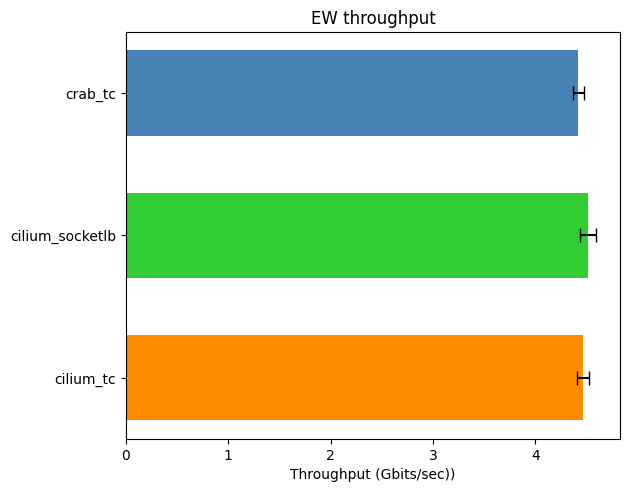

In [4]:
bar_positions = np.arange(len(iperf_means))
height = 0.6
colors = ['#FF8C00', '#32CD32', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std_devs, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'cilium_socketlb', 'crab_tc'])
plt.xlabel('Throughput (Gbits/sec))')
plt.tight_layout()
plt.title("EW throughput")
plt.show()

In [5]:
cilium_tc_ew_RR = [[139,158,188], [140,158,189], [140,158,188], [139,158,188], [140,158,188], [139,158,188], [140,158,188], [141,162,202], [140,158,189], [140,158,188]]
cilium_socketlb_ew_RR = [[142,161,202], [141,161,199], [141,159,191], [140,158,189], [140,158,189], [140,158,189], [140,158,188], [140,158,189], [140,158,190], [140,159,190]]
crab_tc_ew_RR = [[140,159,201], [141,159,195], [140,158,189], [140,158,190], [140,158,189], [140,158,189], [140,158,191], [140,158,189], [141,159,193], [141,160,200]]

cilium_tc_ew_RR_50per = [x[0] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_50per = [x[0] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_50per = [x[0] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_90per = [x[1] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_90per = [x[1] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_90per = [x[1] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_99per = [x[2] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_99per = [x[2] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_99per = [x[2] for x in crab_tc_ew_RR]

ew_RR_50per_means = [np.mean(cilium_tc_ew_RR_50per), np.mean(cilium_socketlb_ew_RR_50per), np.mean(crab_tc_ew_RR_50per)]
ew_RR_90per_means = [np.mean(cilium_tc_ew_RR_90per), np.mean(cilium_socketlb_ew_RR_90per), np.mean(crab_tc_ew_RR_90per)]
ew_RR_99per_means = [np.mean(cilium_tc_ew_RR_99per), np.mean(cilium_socketlb_ew_RR_99per), np.mean(crab_tc_ew_RR_99per)]

ew_RR_50per_stds = [np.std(cilium_tc_ew_RR_50per), np.std(cilium_socketlb_ew_RR_50per), np.std(crab_tc_ew_RR_50per)]
ew_RR_90per_stds = [np.std(cilium_tc_ew_RR_90per), np.std(cilium_socketlb_ew_RR_90per), np.std(crab_tc_ew_RR_90per)]
ew_RR_99per_stds = [np.std(cilium_tc_ew_RR_99per), np.std(cilium_socketlb_ew_RR_99per), np.std(crab_tc_ew_RR_99per)]


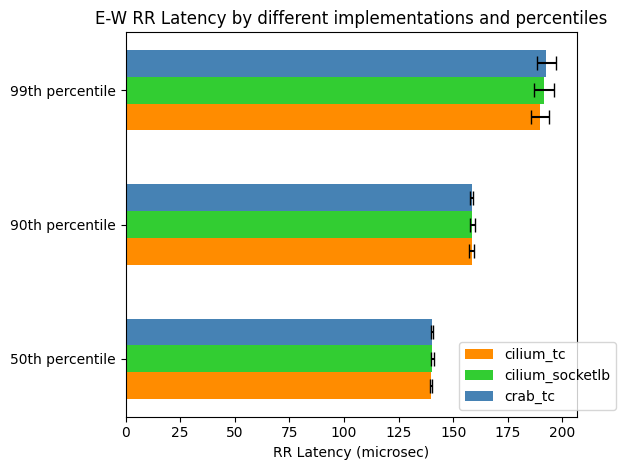

In [6]:

percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_RR_50per_means, ew_RR_50per_stds), 
                                  (ew_RR_90per_means, ew_RR_90per_stds), 
                                  (ew_RR_99per_means, ew_RR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('RR Latency (microsec)')
ax.set_title('E-W RR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

plt.tight_layout()
plt.show()

In [7]:
cilium_tc_ew_CRR = [[660,751,921], [660,756,1019], [654,742,1019], [653,740,1090], [654,740,954], [654,745,1324], [653,739,972], [652,741,1226], [654,750,1623], [655,745,1027]]
cilium_socketlb_ew_CRR = [[677,770,909], [676,779,1370], [675,788,1733], [673,767,1290], [672,773,1539], [674,771,1519], [673,762,1180], [675,776,1777], [674,766,991], [677,772,921]]
crab_tc_ew_CRR = [[702,794,930], [704,799,912], [705,801,923], [708,805,940], [709,809,963], [776,886,993], [729,846,1050], [708,815,960], [705,800,912], [696,774,960]]

cilium_tc_ew_CRR_50per = [x[0] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_50per = [x[0] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_50per = [x[0] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_90per = [x[1] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_90per = [x[1] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_90per = [x[1] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_99per = [x[2] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_99per = [x[2] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_99per = [x[2] for x in crab_tc_ew_CRR]

ew_CRR_50per_means = [np.mean(cilium_tc_ew_CRR_50per), np.mean(cilium_socketlb_ew_CRR_50per), np.mean(crab_tc_ew_CRR_50per)]
ew_CRR_90per_means = [np.mean(cilium_tc_ew_CRR_90per), np.mean(cilium_socketlb_ew_CRR_90per), np.mean(crab_tc_ew_CRR_90per)]
ew_CRR_99per_means = [np.mean(cilium_tc_ew_CRR_99per), np.mean(cilium_socketlb_ew_CRR_99per), np.mean(crab_tc_ew_CRR_99per)]

ew_CRR_50per_stds = [np.std(cilium_tc_ew_CRR_50per), np.std(cilium_socketlb_ew_CRR_50per), np.std(crab_tc_ew_CRR_50per)]
ew_CRR_90per_stds = [np.std(cilium_tc_ew_CRR_90per), np.std(cilium_socketlb_ew_CRR_90per), np.std(crab_tc_ew_CRR_90per)]
ew_CRR_99per_stds = [np.std(cilium_tc_ew_CRR_99per), np.std(cilium_socketlb_ew_CRR_99per), np.std(crab_tc_ew_CRR_99per)]

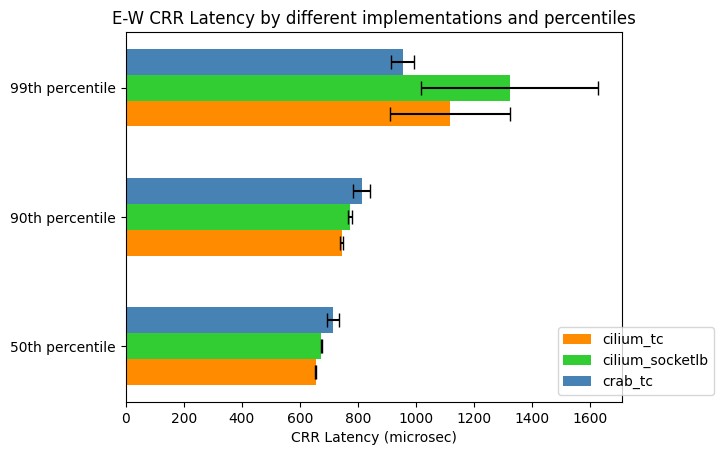

59.30000000000007


In [8]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_CRR_50per_means, ew_CRR_50per_stds), 
                                  (ew_CRR_90per_means, ew_CRR_90per_stds), 
                                  (ew_CRR_99per_means, ew_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('E-W CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()
print(ew_CRR_50per_means[2] - ew_CRR_50per_means[0])

In [9]:
cilium_tc_iperf_array = [742, 750, 760, 782, 759, 768, 754, 762, 755, 786]
crab_tc_iperf_array = [760, 803, 795, 760, 732, 760, 761, 760, 760, 759]
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std = [np.std(cilium_tc_iperf_array), np.std(crab_tc_iperf_array)]

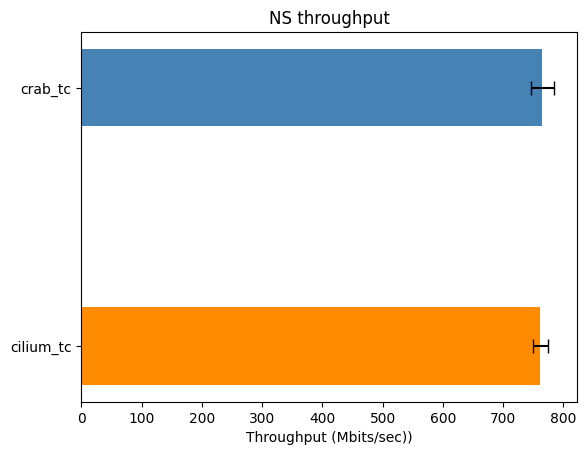

In [10]:
bar_positions = np.arange(len(iperf_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Throughput (Mbits/sec))')

plt.title("NS throughput")
plt.show()

In [73]:
cilium_curl = [[.002526,.004051],[.002497,.003950],[.002530,.003976],[.002521,.003978],[.002547,.004019],[.002541,.003993],[.002585,.004054],[.002588,.004040],[.002609,.004088],[.002646,.004283],]
crab_curl = [[.002619,.004251],[.002578,.004161],[.002592,.004181],[.002559,.004115],[.002580,.004167],[.002626,.004182],[.002634,.004178],[.002617,.004145],[.002683,.004246],[.002648,.004180],]
# first item
cilium_curl_connection = [x[0] for x in cilium_curl]
crab_curl_connection = [x[0] for x in crab_curl]
# second item
cilium_curl_total = [x[1] for x in cilium_curl]
crab_curl_total = [x[1] for x in crab_curl]

curl_connection_means = [np.mean(cilium_curl_connection) * 1000000, np.mean(crab_curl_connection) * 1000000]
curl_total_means = [np.mean(cilium_curl_total) * 1000000, np.mean(crab_curl_total) * 1000000]
curl_connection_stds = [np.std(cilium_curl_connection) * 1000000, np.std(crab_curl_connection) * 1000000]
curl_total_stds = [np.std(cilium_curl_total) * 1000000, np.std(crab_curl_total) * 1000000]


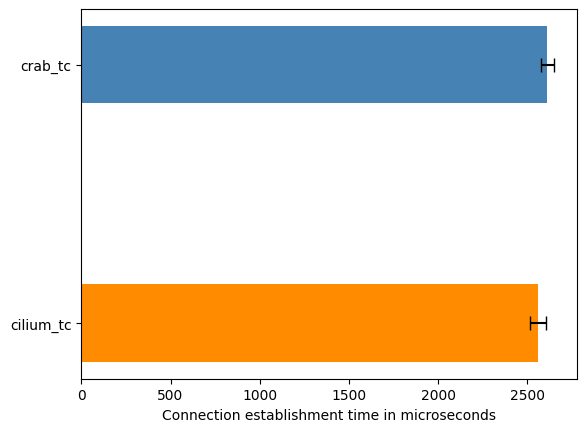

54.60000000000082


In [74]:
# plot
bar_positions = np.arange(len(curl_connection_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, curl_connection_means, xerr=curl_connection_stds, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Connection establishment time in microseconds')

plt.show()
print(curl_connection_means[1] - curl_connection_means[0])

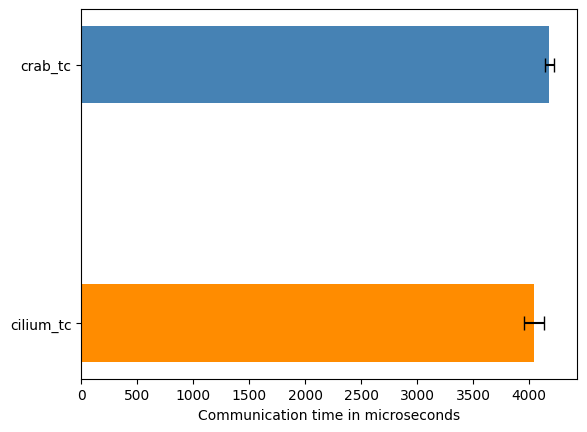

137.39999999999827


In [75]:
bar_positions = np.arange(len(curl_total_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, curl_total_means, xerr=curl_total_stds, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Communication time in microseconds')

plt.show()
print(curl_total_means[1] - curl_total_means[0])

In [76]:
cilium_tc_ew_CRR = [[635,733,1173], [639,737,1178], [639,738,1054], [638,735,1089], [636,731,1092], [637,734,1075], [638,735,1062], [655,771,1081], [638,733,1063], [638,735,1098]]
cilium_socketlb_ew_CRR = [[658,750,1089], [659,751,1075], [657,746,1132], [660,753,1132], [657,749,1334], [658,747,1096], [658,750,1213], [660,753,1167], [657,750,1405], [659,754,1197]]
crab_tc_ew_CRR = [[679,765,883], [679,763,885], [680,775,913], [691,796,936], [684,782,913], [682,777,902], [680,765,885], [689,792,963], [689,800,952], [683,778,923]]

cilium_tc_ew_CRR_50per = [x[0] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_50per = [x[0] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_50per = [x[0] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_90per = [x[1] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_90per = [x[1] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_90per = [x[1] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_99per = [x[2] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_99per = [x[2] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_99per = [x[2] for x in crab_tc_ew_CRR]

ew_CRR_50per_means = [np.mean(cilium_tc_ew_CRR_50per), np.mean(cilium_socketlb_ew_CRR_50per), np.mean(crab_tc_ew_CRR_50per)]
ew_CRR_90per_means = [np.mean(cilium_tc_ew_CRR_90per), np.mean(cilium_socketlb_ew_CRR_90per), np.mean(crab_tc_ew_CRR_90per)]
ew_CRR_99per_means = [np.mean(cilium_tc_ew_CRR_99per), np.mean(cilium_socketlb_ew_CRR_99per), np.mean(crab_tc_ew_CRR_99per)]

ew_CRR_50per_stds = [np.std(cilium_tc_ew_CRR_50per), np.std(cilium_socketlb_ew_CRR_50per), np.std(crab_tc_ew_CRR_50per)]
ew_CRR_90per_stds = [np.std(cilium_tc_ew_CRR_90per), np.std(cilium_socketlb_ew_CRR_90per), np.std(crab_tc_ew_CRR_90per)]
ew_CRR_99per_stds = [np.std(cilium_tc_ew_CRR_99per), np.std(cilium_socketlb_ew_CRR_99per), np.std(crab_tc_ew_CRR_99per)]

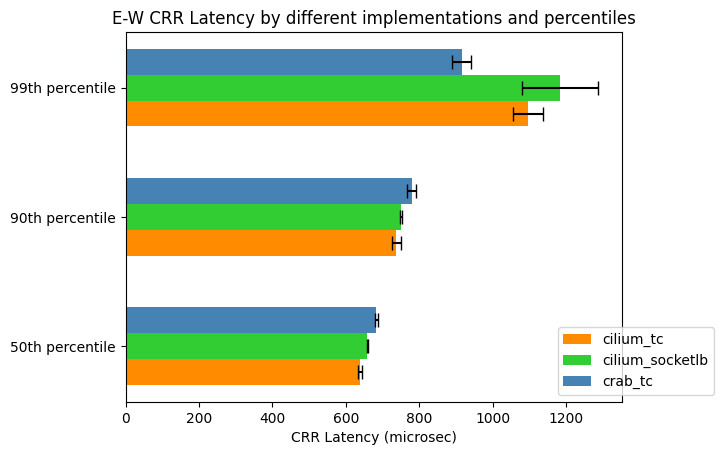

44.30000000000007


In [77]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_CRR_50per_means, ew_CRR_50per_stds), 
                                  (ew_CRR_90per_means, ew_CRR_90per_stds), 
                                  (ew_CRR_99per_means, ew_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('E-W CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()
print(ew_CRR_50per_means[2] - ew_CRR_50per_means[0])